In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.impute import KNNImputer
from sklearn import metrics
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [2]:
df = pd.read_csv("credit_risk_dataset.csv")

In [3]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [4]:
def Summary(df):
    Summary = pd.DataFrame(columns=["Data Types"],data= df.dtypes)
    Summary["Mssing data"] = df.isna().sum()
    Summary["Missing data %"]=(df.isna().sum())/len(df)*100
    Summary["Duplicate"]=df.duplicated().sum()
    Summary["Unique"]=df.nunique().values
    desc = pd.DataFrame(data=df.describe(include="all").transpose())
    Summary["Mean"] = desc["mean"]
    Summary["min"]=desc["min"]
    Summary["Max"]=desc["max"]
    Summary["First Value"] = df.loc[1].values
    Summary["Last value"] = df.iloc[-1]
    return Summary
Summ= Summary(df)
Summ

,Data Types,Mssing data,Missing data %,Duplicate,Unique,Mean,min,Max,First Value,Last value
person_age,int64,0,0.000000,165,58,27.7346,20.0,144.0,21,66
person_income,int64,0,0.000000,165,4295,66074.84847,4000.0,6000000.0,9600,42000
person_home_ownership,object,0,0.000000,165,4,NaN,NaN,NaN,OWN,RENT
person_emp_length,float64,895,2.747000,165,36,4.789686,0.0,123.0,5.0,2.0
loan_intent,object,0,0.000000,165,6,NaN,NaN,NaN,EDUCATION,MEDICAL
loan_grade,object,0,0.000000,165,7,NaN,NaN,NaN,B,B
loan_amnt,int64,0,0.000000,165,753,9589.371106,500.0,35000.0,1000,6475
loan_int_rate,float64,3116,9.563856,165,348,11.011695,5.42,23.22,11.14,9.99
loan_status,int64,0,0.000000,165,2,0.218164,0.0,1.0,0,0
loan_percent_income,float64,0,0.000000,165,77,0.170203,0.0,0.83,0.1,0.15


In [5]:
df= df[df["person_age"] <= 80]
Summ_new = Summary(df)
Summ_new

,Data Types,Mssing data,Missing data %,Duplicate,Unique,Mean,min,Max,First Value,Last value
person_age,int64,0,0.000000,165,54,27.714281,20.0,80.0,21,66
person_income,int64,0,0.000000,165,4294,65882.539264,4000.0,2039784.0,9600,42000
person_home_ownership,object,0,0.000000,165,4,NaN,NaN,NaN,OWN,RENT
person_emp_length,float64,895,2.747590,165,36,4.789735,0.0,123.0,5.0,2.0
loan_intent,object,0,0.000000,165,6,NaN,NaN,NaN,EDUCATION,MEDICAL
loan_grade,object,0,0.000000,165,7,NaN,NaN,NaN,B,B
loan_amnt,int64,0,0.000000,165,753,9589.199975,500.0,35000.0,1000,6475
loan_int_rate,float64,3114,9.559772,165,348,11.011666,5.42,23.22,11.14,9.99
loan_status,int64,0,0.000000,165,2,0.218211,0.0,1.0,0,0
loan_percent_income,float64,0,0.000000,165,77,0.170211,0.0,0.83,0.1,0.15


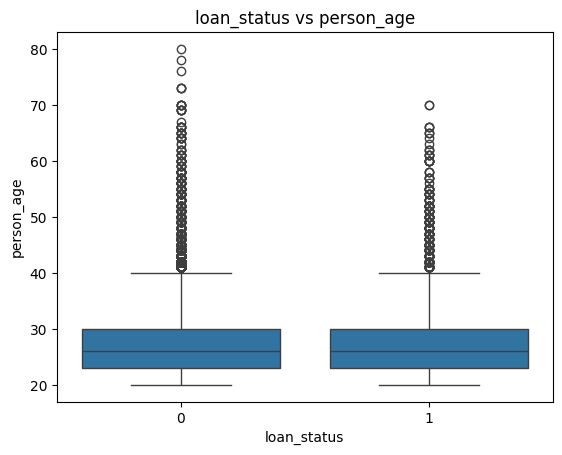

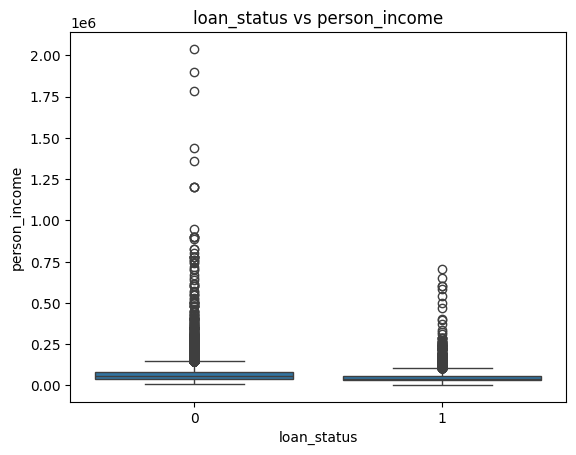

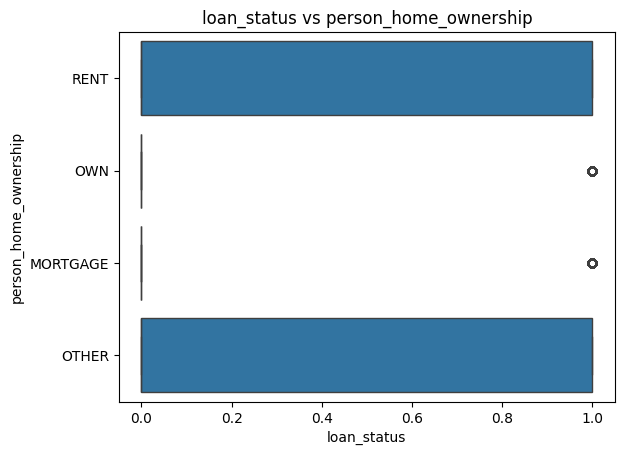

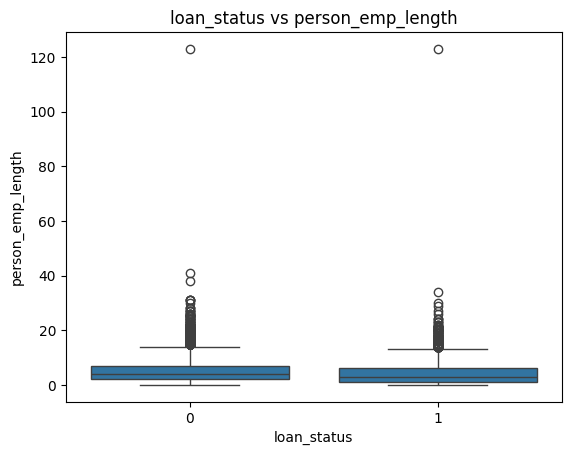

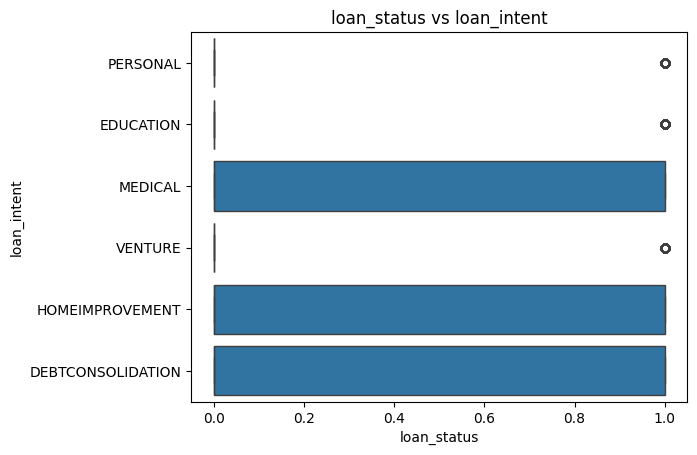

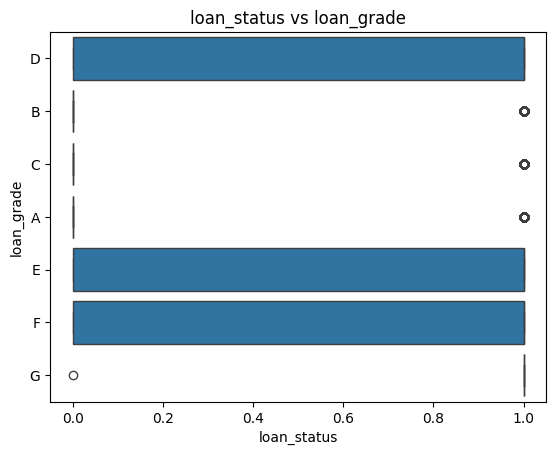

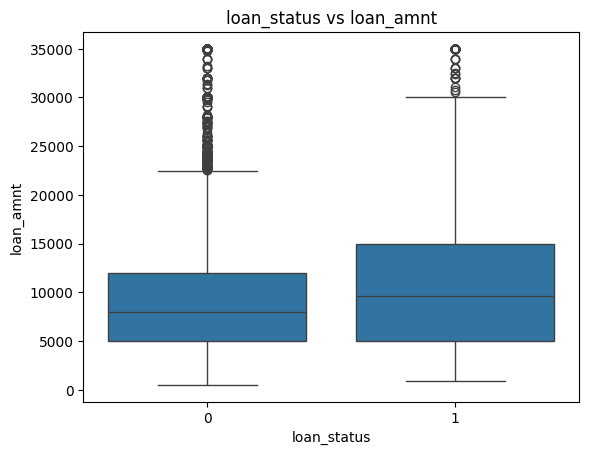

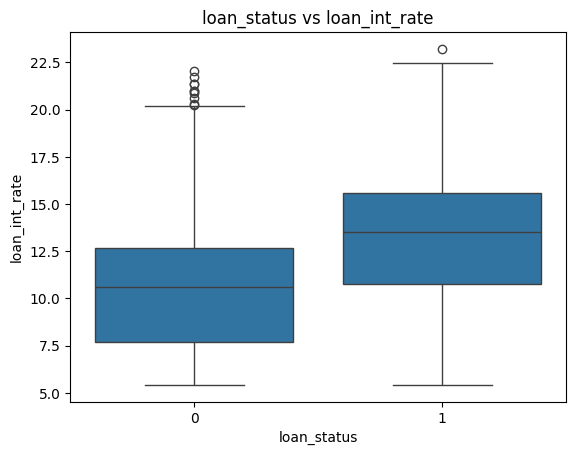

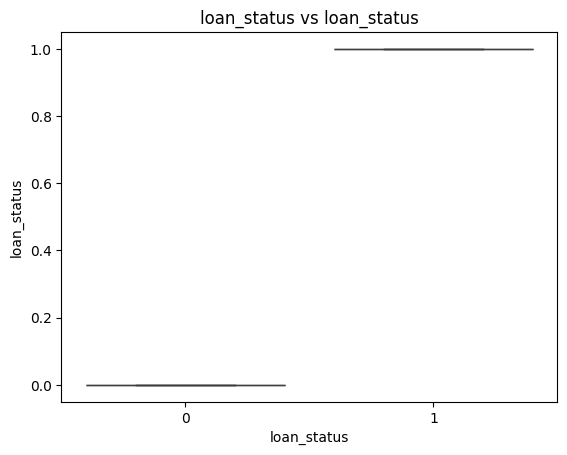

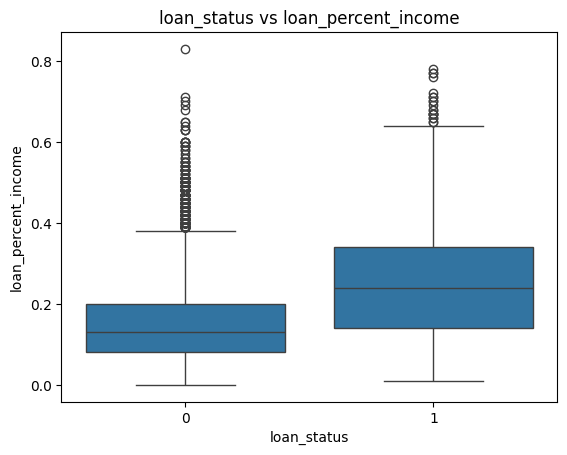

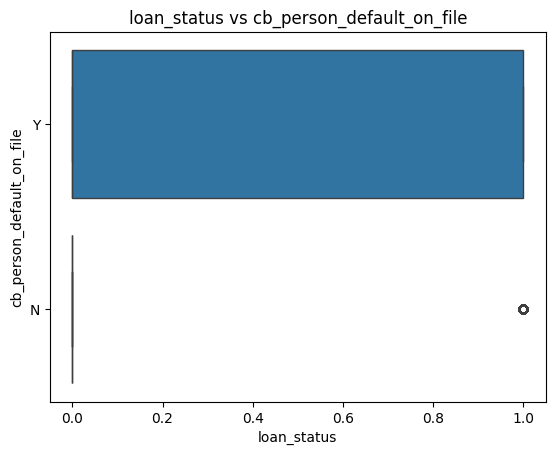

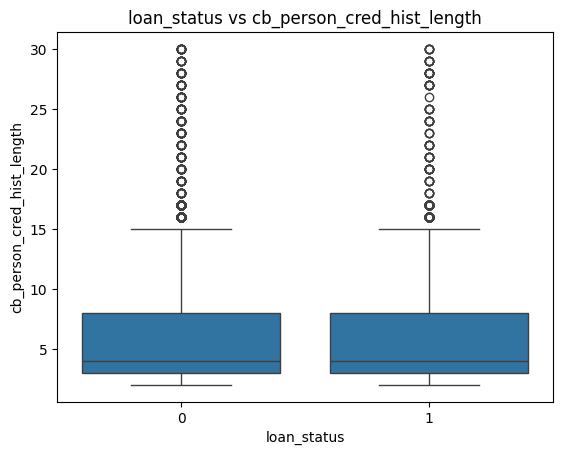

In [7]:
def box_plot(df):
    for cols in df.columns:
        plt.title(f"loan_status vs {cols}")
        plt.xlabel("loan_status")
        plt.ylabel(f"{cols}")
        sn.boxplot(data=df,y=cols,x="loan_status")
        plt.show()

box_plot(df)

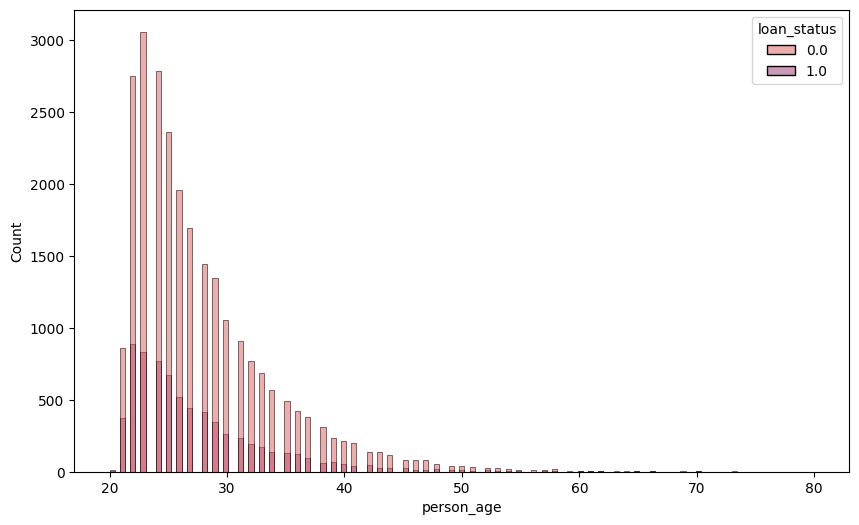

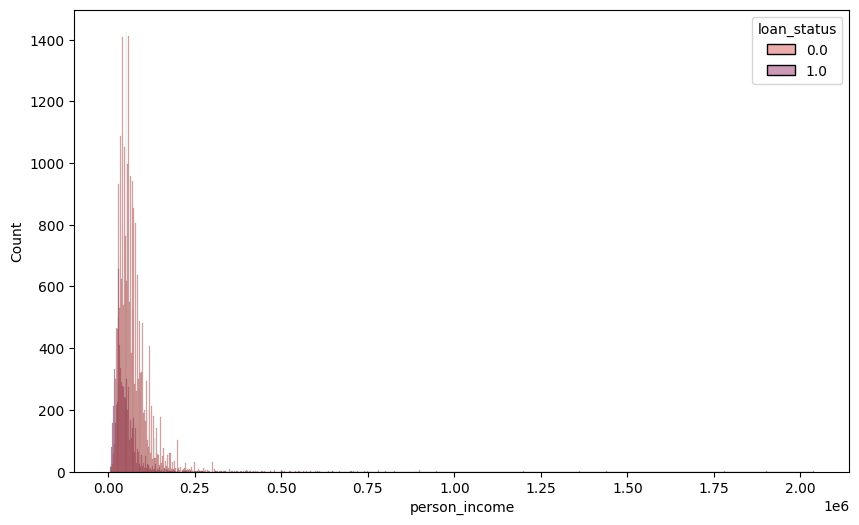

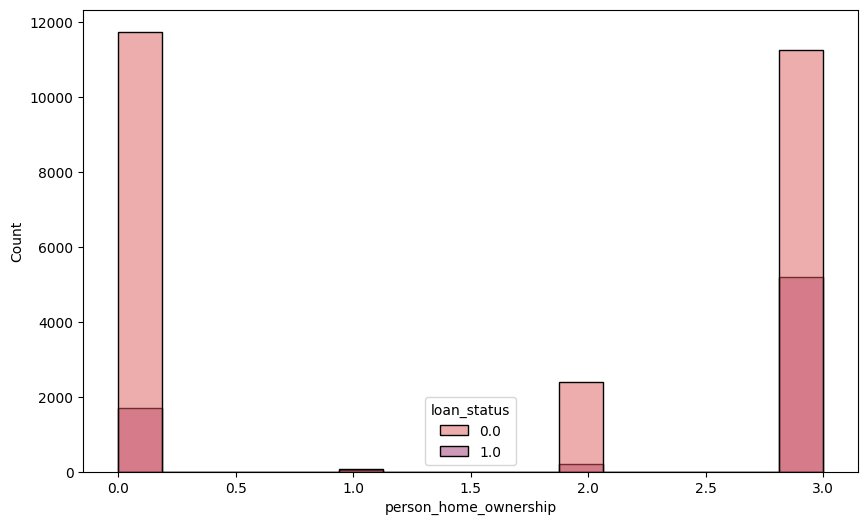

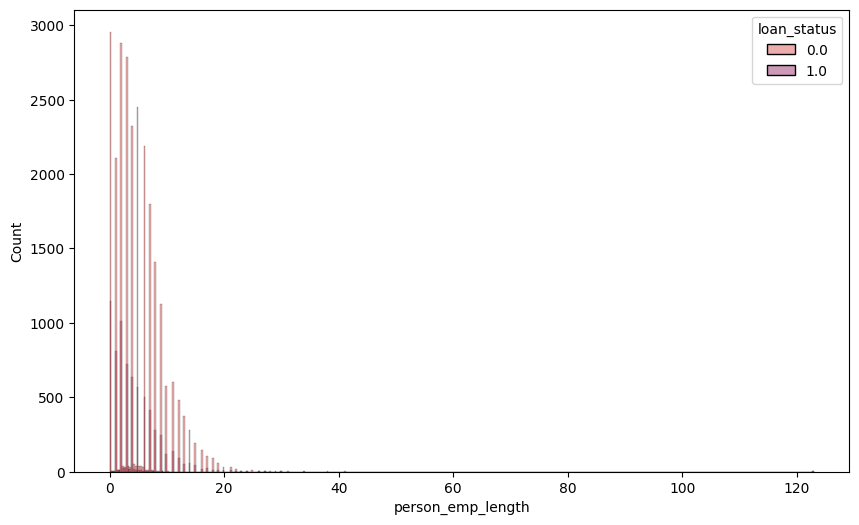

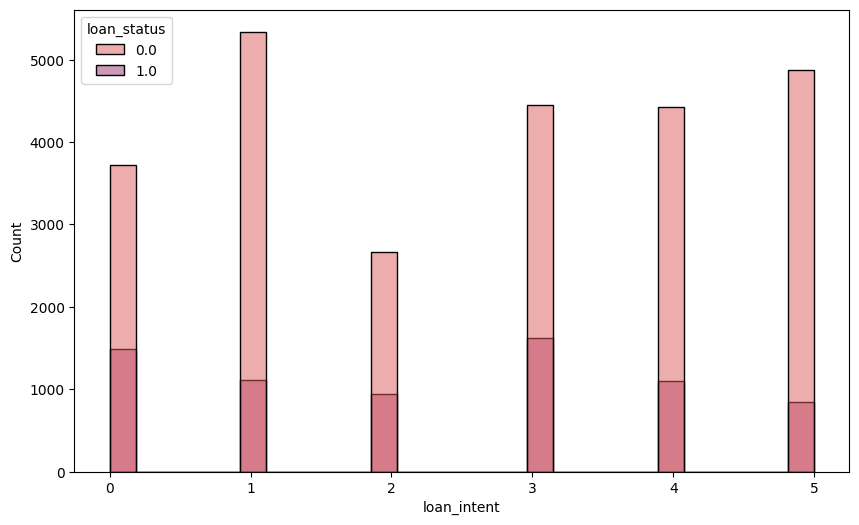

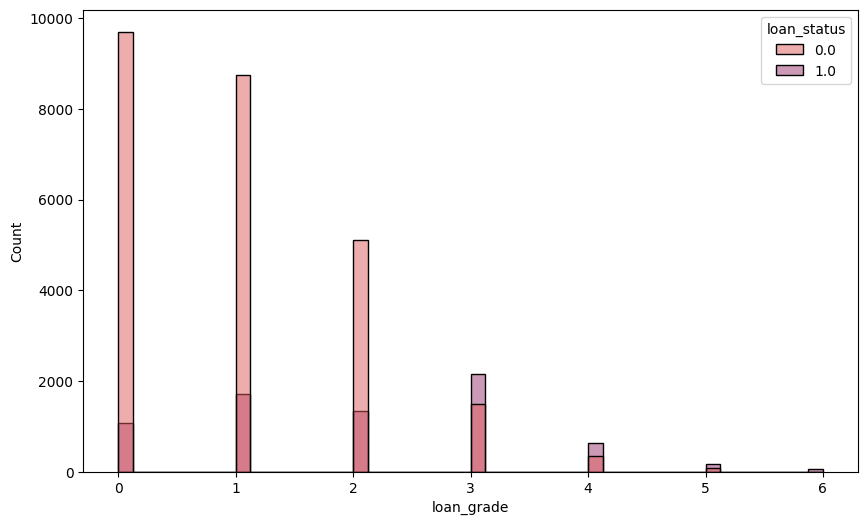

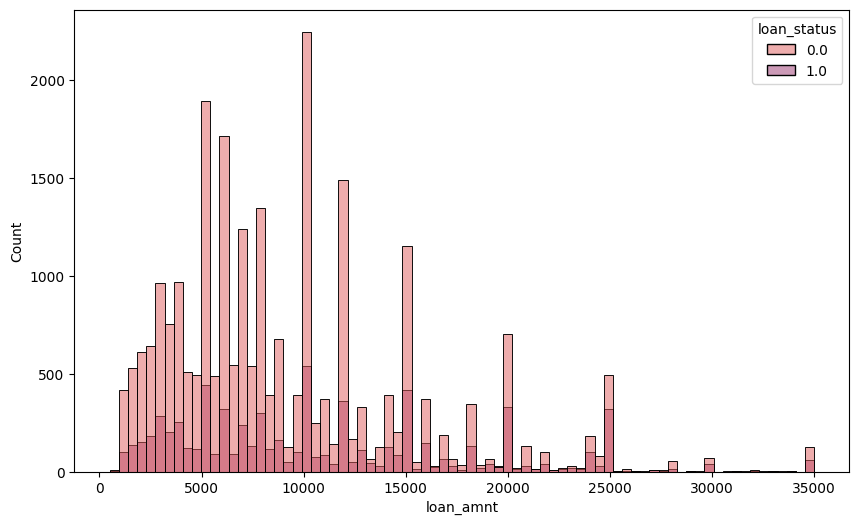

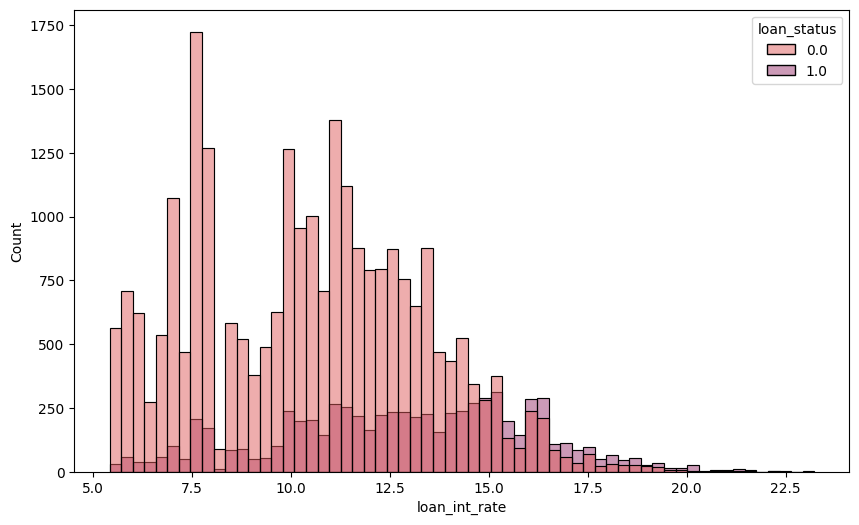

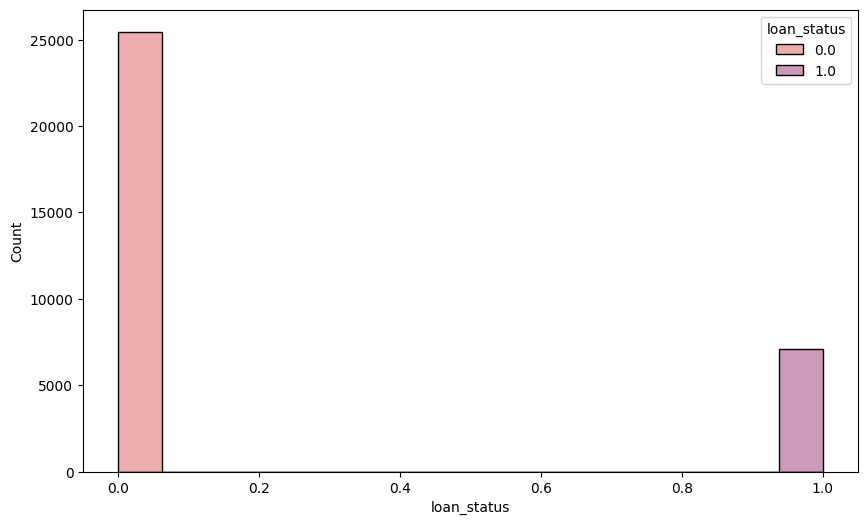

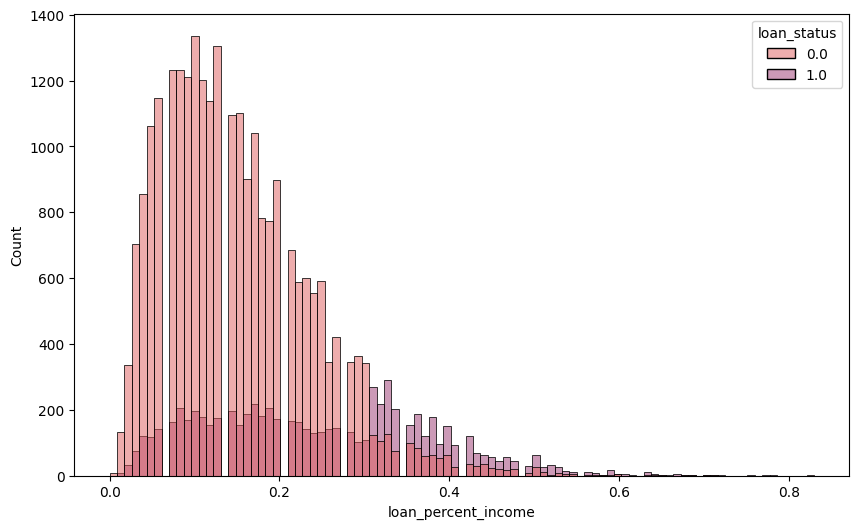

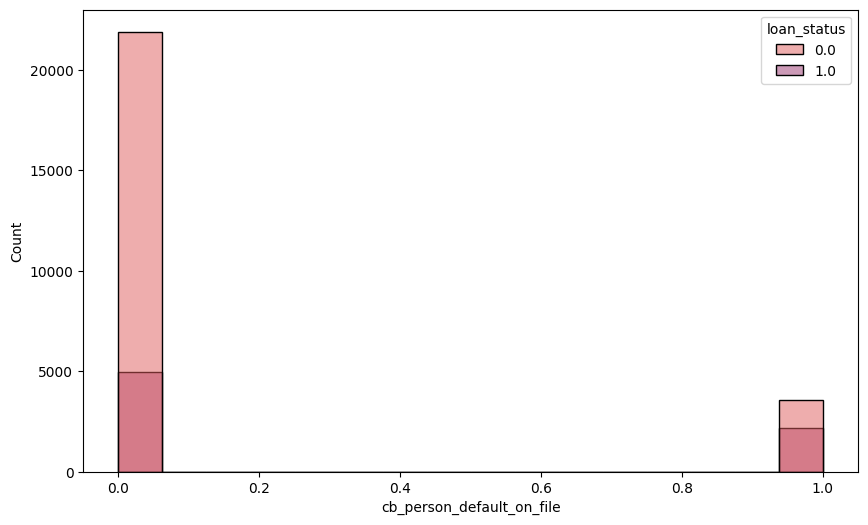

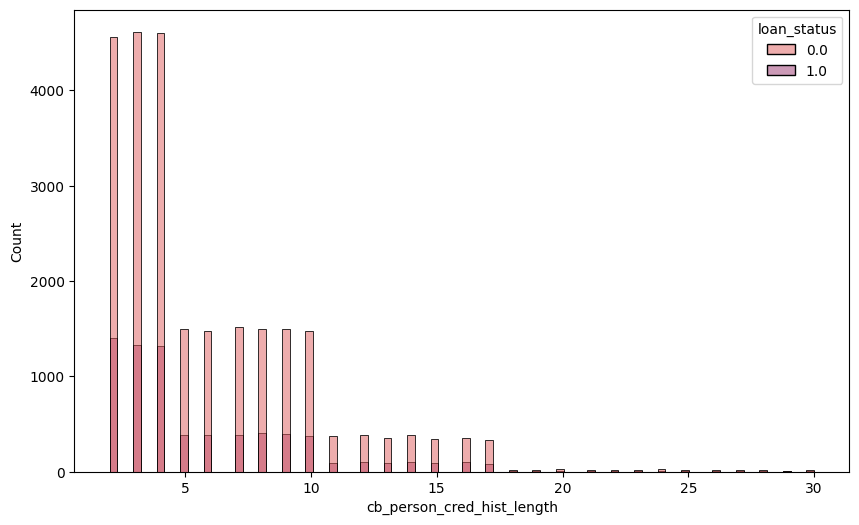

In [35]:
def histogram(df):
    for cols in df.columns:
        plt.figure(figsize=(10,6))
        plt.xlabel(f"{cols}")
        sn.histplot(df,x=cols,hue="loan_status",palette="flare")
        plt.show()
histogram(df)

In [11]:
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype=="object":
        df[col]= le.fit_transform(df[col])

In [12]:
# Replace Missing values
K_imp = KNNImputer(n_neighbors=10)
df=pd.DataFrame(K_imp.fit_transform(df[['person_age', 'person_income', 'person_home_ownership', 'person_emp_length', 'loan_intent', 'loan_grade'
                         , 'loan_amnt', 'loan_int_rate', 'loan_status', 'loan_percent_income', 'cb_person_default_on_file'
                         , 'cb_person_cred_hist_length']]), 
                columns=['person_age', 'person_income', 'person_home_ownership', 'person_emp_length', 'loan_intent', 'loan_grade'
                         , 'loan_amnt', 'loan_int_rate', 'loan_status', 'loan_percent_income', 'cb_person_default_on_file'
                         , 'cb_person_cred_hist_length'])
Summ = Summary(df)
Summ

,Data Types,Mssing data,Missing data %,Duplicate,Unique,Mean,min,Max,First Value,Last value
person_age,float64,0,0.0,165,54,27.714281,20.00,80.00,21.00,66.00
person_income,float64,0,0.0,165,4294,65882.539264,4000.00,2039784.00,9600.00,42000.00
person_home_ownership,float64,0,0.0,165,4,1.676214,0.00,3.00,2.00,3.00
person_emp_length,float64,0,0.0,165,112,4.770105,0.00,123.00,5.00,2.00
loan_intent,float64,0,0.0,165,6,2.533677,0.00,5.00,1.00,3.00
loan_grade,float64,0,0.0,165,7,1.218180,0.00,6.00,1.00,1.00
loan_amnt,float64,0,0.0,165,753,9589.199975,500.00,35000.00,1000.00,6475.00
loan_int_rate,float64,0,0.0,165,2653,11.008384,5.42,23.22,11.14,9.99
loan_status,float64,0,0.0,165,2,0.218211,0.00,1.00,0.00,0.00
loan_percent_income,float64,0,0.0,165,77,0.170211,0.00,0.83,0.10,0.15


Text(0.5, 1.0, 'Correlation Matrix')

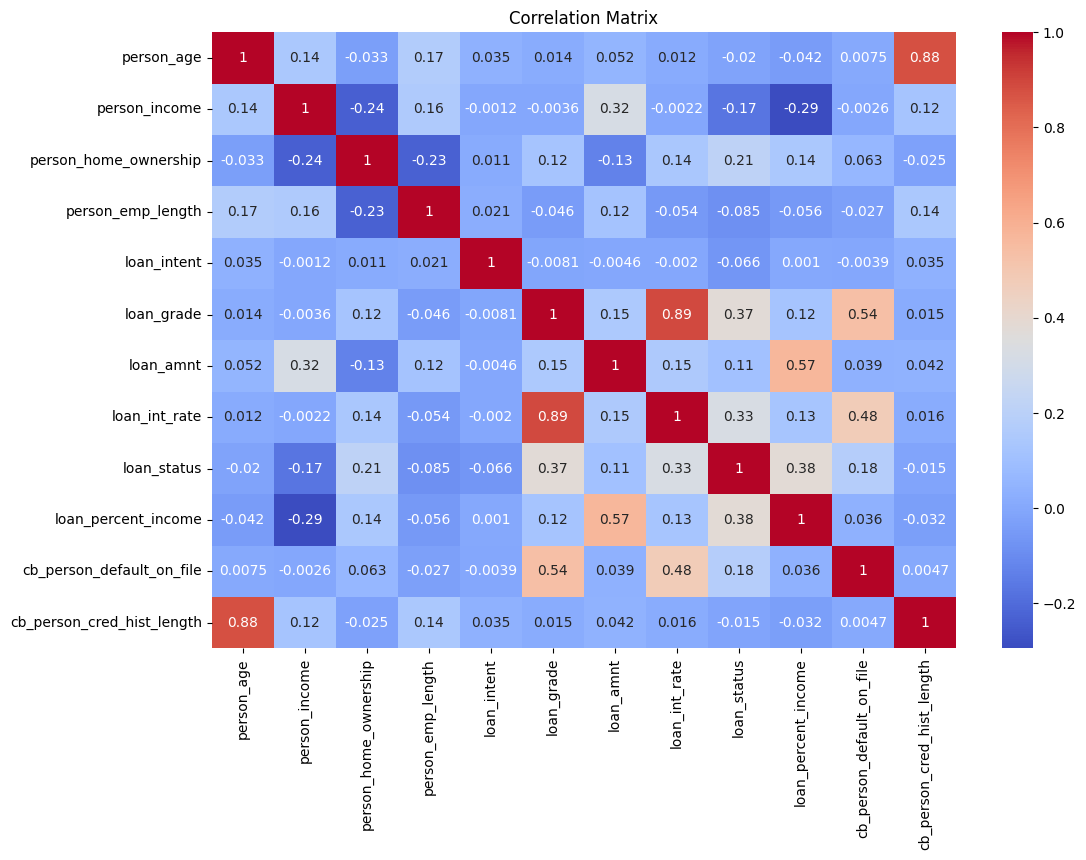

In [13]:
corr = df.corr()
plt.figure(figsize=(12, 8))
sn.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')

In [14]:
#Feature Selection
target_corr =corr["loan_status"].drop("loan_status")

selec_corr = target_corr[target_corr.abs()> -0.2].index.tolist()

feature_matrix = corr.loc[selec_corr,selec_corr]
to_remove = set()
for i in range(len(selec_corr)):
    for j in range(i+1, len(selec_corr)):
        if abs(feature_matrix.iloc[i, j]) > 0.8:
          # Remove the feature that has less correlation with the target variable
            if abs(target_corr[selec_corr[i]]) > abs(target_corr[selec_corr[j]]):
                to_remove.add(selec_corr[j])
            else:
                to_remove.add(selec_corr[i])
    
    # Final feature set after removing redundant features
best_features = [feature for feature in selec_corr if feature not in to_remove]
best_features


['person_age',
 'person_income',
 'person_home_ownership',
 'person_emp_length',
 'loan_intent',
 'loan_grade',
 'loan_amnt',
 'loan_percent_income',
 'cb_person_default_on_file']

In [34]:
Sc = StandardScaler()
X= df[best_features]
Y=df["loan_status"].values

X=Sc.fit_transform(X)

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=4)

Accuracy_Score=pd.DataFrame(columns=["Algorithm","Best_Accuracy_Score"])

In [25]:
#Parameters and Algorithnms dictionaries
param_grid = {
    "K Nearest Neighbour":
    {
       "n_neighbors":list(range(1,11)) ,
       "weights":["uniform","distance"],
       "algorithm":["auto", "ball_tree", "kd_tree", "brute"]
    },
    "Descision Tree Classifier":
    {
    'max_depth': [4, 6, 8, 10, None],
    'criterion': ['gini', 'entropy',"log_loss"],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    "splitter":["random","best"],
    "max_depth":list(range(1, 6)) 
    },
    "Random Forest Classifier":
    {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [4, 6, 8, 10, None],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
    },
    "Logistic Regressor":
    {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],  # Norm used in penalization
    'solver': ['liblinear', 'saga']
    }
}

Algorithms = {
   "Random Forest Classifier":RandomForestClassifier(random_state=4),
   "Descision Tree Classifier":DecisionTreeClassifier(random_state=4),
   "K Nearest Neighbour": KNeighborsClassifier(),
   "Logistic Regressor":LogisticRegression(random_state=4)
}

In [26]:
# Selecting the best parameters for each algorithm
acc_sc = []
for i,obj in Algorithms.items():
    for j,para_obj in param_grid.items():
        if i!=j :
            continue
        else:
            grid_search = GridSearchCV(estimator=obj,param_grid=para_obj,
                                       cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
            grid_search.fit(X_train,y_train)

            best_params = grid_search.best_params_
            best_score = grid_search.best_score_

            print(f"Best parameters for {obj} :",best_params)
            print(f"Best score for {obj}:",best_score*100)

            bs_clf = grid_search.best_estimator_

            yhat = bs_clf.predict(X_test)

            Acc_Score = metrics.accuracy_score(y_test,yhat)
            acc_sc.append({"Algorithm":i,"Best_Accuracy_Score":Acc_Score})
        

Fitting 5 folds for each of 360 candidates, totalling 1800 fits
Best parameters for RandomForestClassifier(random_state=4) : {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best score for RandomForestClassifier(random_state=4): 93.14942283355835
Fitting 5 folds for each of 270 candidates, totalling 1350 fits
Best parameters for DecisionTreeClassifier(random_state=4) : {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Best score for DecisionTreeClassifier(random_state=4): 91.32931855510297
Fitting 5 folds for each of 80 candidates, totalling 400 fits
Best parameters for KNeighborsClassifier() : {'algorithm': 'auto', 'n_neighbors': 8, 'weights': 'distance'}
Best score for KNeighborsClassifier(): 88.3074964323767
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters for LogisticRegression(random_state=4) : {'C': 1, 'penalty': 'l2', 'solver': 'li

In [29]:
Accuracy_Score=pd.concat([Accuracy_Score,pd.DataFrame(acc_sc)])
Accuracy_Score["Best_Accuracy_score"]=Accuracy_Score["Best_Accuracy_score"].multiply(100)
Accuracy_Score


,Algorithm,Best_Accuracy_score
0,Random Forest Classifier,93.062519
1,Descision Tree Classifier,91.036529
2,K Nearest Neighbour,88.652410
3,Logistic Regressor,84.436713


In [33]:
# Get the index of the row with the maximum accuracy score
max_index = Accuracy_Score["Best_Accuracy_score"].idxmax()

# Get the algorithm name and the max accuracy score
max_acc = Accuracy_Score.loc[max_index, "Best_Accuracy_score"]
max_algo = Accuracy_Score.loc[max_index, "Algorithm"]

# Print the result
print(f"The Algorithm with the highest accuracy is {max_algo} with the Accuracy of {max_acc:.2f}%")


The Algorithm with the highest accuracy is Random Forest Classifier with the Accuracy of 93.06%
